Churn - dependent feature ('Yes' denotes customers left, 'No' denotes customer stay here)

# Machine Learning in Customer Churn Prediction
This work is to apply various machine learning method on Telco customers churn dataset (WA_Fn-UseC_-Telco-Customer-Churn.csv)

* Random Forest Classifier
* Support Vector Machine Classifier
* K-Nearest Neighbour(KNN)
* Naive Bayes
* Decision Tree Classification

In [1]:
import numpy as np # Multi-dimensional array object
import pandas as pd # Data Manipulation
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization
import plotly.express as px # Interactive Data Visualization
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # Offline version of the Plotly modules.
import cufflinks as cf # Works as a connector between the pandas library and plotly
cf.go_offline() 



In [2]:
#load data on dataframe
telco_df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
#display dataframe
telco_df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#count of rows and columns
telco_df.shape

(7043, 21)

In [4]:
# Get data frame info
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Change TotalCharges column type to numeric
telco_df.TotalCharges = pd.to_numeric(telco_df.TotalCharges, errors='coerce')
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Get the statistics of the data frame
telco_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
# There are 11 missing values out of 7043 values in TotalCharges column. I prefer deleting rows with null values 
telco_df.dropna(inplace = True)

In [8]:
# We don't need customerID column for analyzing
telco_df.drop(['customerID'], axis =1, inplace =True)

In [9]:
telco_df.gender = [1 if each == "Male" else 0 for each in telco_df.gender]

columns_to_convert = ['Partner', 
                      'Dependents', 
                      'PhoneService', 
                      'OnlineSecurity',
                      'OnlineBackup',
                      'DeviceProtection',
                      'TechSupport',
                      'StreamingTV',
                      'StreamingMovies',
                      'PaperlessBilling', 
                      'Churn',
                      'MultipleLines']

for item in columns_to_convert:
    telco_df[item] = [1 if each == "Yes" else 0 if each == "No" else -1 for each in telco_df[item]]

telco_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,-1,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,-1,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [10]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   object 


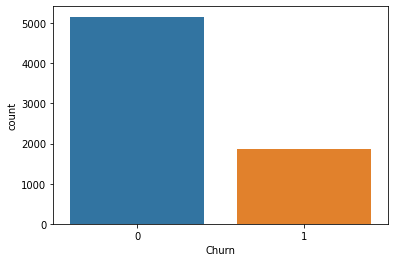

In [11]:
sns.countplot(x="Churn",data=telco_df);

In [12]:
counts = telco_df['Churn'].value_counts()
counts

0    5163
1    1869
Name: Churn, dtype: int64

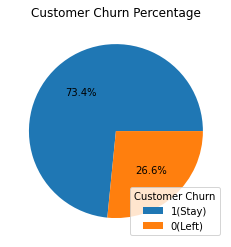

In [13]:
fig, ax = plt.subplots()
ax.pie(counts, autopct='%1.1f%%')
ax.legend(labels=['1(Stay)', '0(Left)'], title='Customer Churn',loc='lower right')
ax.set_title("Customer Churn Percentage")
plt.show()

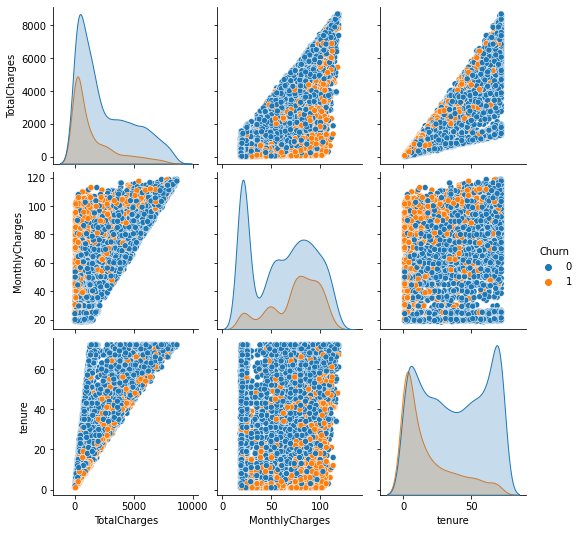

In [14]:
sns.pairplot(telco_df,vars = ['TotalCharges','MonthlyCharges','tenure'], hue="Churn")

From the above graph, we can see that people who have lower tenure and higher monthly charges are tend to churn more.

In [15]:
counts = telco_df['InternetService'].value_counts()
counts

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

<AxesSubplot:xlabel='InternetService', ylabel='count'>

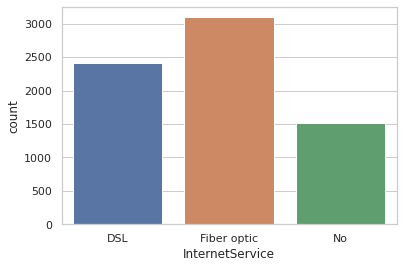

In [16]:
sns.set(style="whitegrid")
sns.countplot(x="InternetService", data = telco_df)

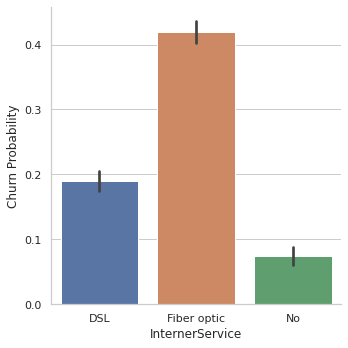

In [17]:
sns.set(style="whitegrid")
g1=sns.catplot(x="InternetService", y="Churn", data=telco_df,kind="bar")
g1.set(xlabel='InternerService', ylabel = 'Churn Probability')
plt.show()

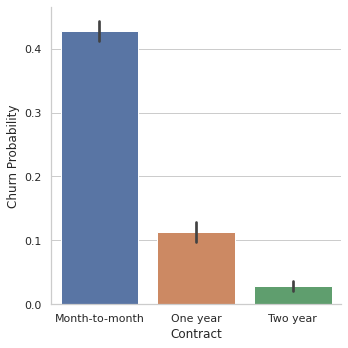

In [18]:
sns.set(style="whitegrid")
g1=sns.catplot(x="Contract", y="Churn", data=telco_df,kind="bar")
g1.set(xlabel='Contract', ylabel = 'Churn Probability')
plt.show()

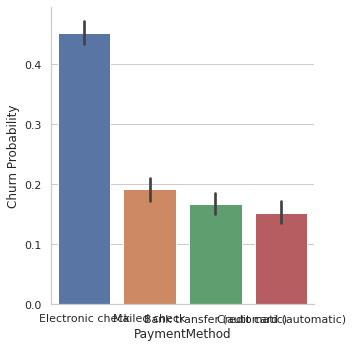

In [19]:
sns.set(style="whitegrid")
g1=sns.catplot(x="PaymentMethod", y="Churn", data=telco_df,kind="bar")
g1.set(xlabel='PaymentMethod', ylabel = 'Churn Probability')
plt.show()

Customers having fiber optic internet service, using electronic payment and having month-to-month contract are tend to churn more. However customers having two-year contract and having no internet service are tend to not churn.

In [20]:
# Let's create new columns by using pandas get_dummies function.
telco_df = pd.get_dummies(data=telco_df)
telco_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,-1,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,-1,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [21]:
# Now see the correlation between churn and all of the columns.
telco_df.corr()['Churn'].sort_values()

tenure                                    -0.354049
Contract_Two year                         -0.301552
InternetService_No                        -0.227578
TotalCharges                              -0.199484
Contract_One year                         -0.178225
Dependents                                -0.163128
Partner                                   -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
gender                                    -0.008545
PhoneService                               0.011691
OnlineSecurity                             0.023014
TechSupport                                0.026744
MultipleLines                              0.036148
OnlineBackup                               0.073934
DeviceProtection                           0.084402
SeniorCitizen                              0.150541
StreamingMov

In [22]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 no

## PREPARE THE DATA BEFORE TRAINING

In [23]:
# Assigning y as input and X as output
y = telco_df['Churn']
new_data = telco_df.drop(['Churn'], axis=1)
X =  (new_data-np.min(new_data))/(np.max(new_data)-np.min(new_data)).values

In [24]:
X[0:5]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.5,1.0,0.5,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.464789,1.0,0.5,1.0,0.5,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.014085,1.0,0.5,1.0,1.0,0.5,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.619718,0.0,0.0,1.0,0.5,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.014085,1.0,0.5,0.5,0.5,0.5,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [25]:
y[0:5]

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [26]:
#Split data into Train and Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =1)

## APPLY MACHINE LEARNING ALGORITHMS

##### Let's do the 
* Random Forest Classifier
* Support Vector Machine Classifier
* K-Nearest Neighbour(KNN)
* Naive Bayes
* Decision Tree Classification
and find the accuracy of each

### RandomForestClassifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

model_rf=RandomForestClassifier(n_estimators = 5, random_state = 1)
model_rf.fit(X_train,y_train.values.ravel())

RandomForestClassifier(n_estimators=5, random_state=1)

In [28]:
y_predict1=model_rf.predict(X_test)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_predict1))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1041
           1       0.56      0.52      0.54       366

    accuracy                           0.77      1407
   macro avg       0.69      0.69      0.69      1407
weighted avg       0.76      0.77      0.76      1407



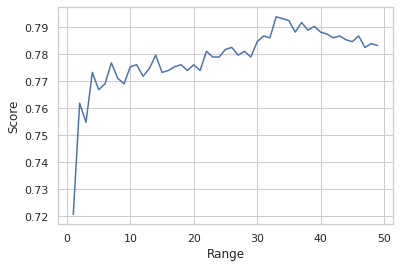

In [30]:
# Find the best number for n_estimators
score_array = []
for number in range(1,50):
    rf_loop = RandomForestClassifier(n_estimators = number, random_state = 1) #set K neighbor as 3
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))
    
plt.plot(range(1,50),score_array)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

As we can see the highest accuracy is at n_estimators = 33

In [31]:
# Let's use the n_estimators = 33

model_rf=RandomForestClassifier(n_estimators = 33, random_state = 1)
model_rf.fit(X_train,y_train.values.ravel())
print("Random Forest accuracy for 5 trees is :",model_rf.score(X_test,y_test))

Random Forest accuracy for 5 trees is : 0.7938877043354655


<AxesSubplot:>

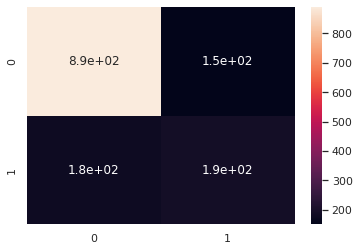

In [32]:
# Another way of looking at the accuracy of the classifier
cm=confusion_matrix(y_test,y_predict1)
sns.heatmap(cm,annot=True)

### SUPPORT VECTOR MACHINE CLASSIFICATION

In [33]:
from sklearn.calibration import CalibratedClassifierCV # For probability score output
from sklearn.svm import LinearSVC

model_svm=LinearSVC(max_iter=10000)
model_svm=CalibratedClassifierCV(model_svm)
model_svm.fit(X_train,y_train)


CalibratedClassifierCV(base_estimator=LinearSVC(max_iter=10000))

In [34]:
y_predict2=model_svm.predict(X_test)

In [35]:
print(classification_report(y_test,y_predict2))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1041
           1       0.63      0.52      0.57       366

    accuracy                           0.80      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



<AxesSubplot:>

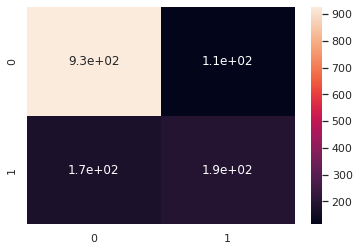

In [36]:
cm=confusion_matrix(y_test,y_predict2)
sns.heatmap(cm, annot=True)



### KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier

model_knn=KNeighborsClassifier()
model_knn.fit(X_train,y_train)

KNeighborsClassifier()

In [38]:
y_predict3=model_knn.predict(X_test)

In [39]:
print(classification_report(y_test,y_predict3))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1041
           1       0.52      0.49      0.51       366

    accuracy                           0.75      1407
   macro avg       0.68      0.67      0.67      1407
weighted avg       0.75      0.75      0.75      1407



<AxesSubplot:>

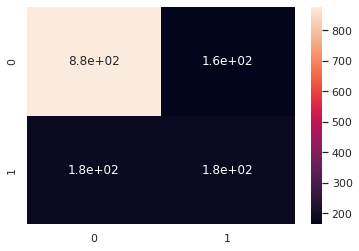

In [40]:
cm=confusion_matrix(y_test,y_predict3)
sns.heatmap(cm,annot=True)

### NAIVE BAYES CLASSIFIER

In [41]:
from sklearn.naive_bayes import GaussianNB

In [42]:
model_gnb=GaussianNB()
model_gnb.fit(X_train, y_train)

GaussianNB()

In [43]:
y_predict4=model_gnb.predict(X_test)

In [44]:
print(classification_report(y_test, y_predict4))

              precision    recall  f1-score   support

           0       0.92      0.68      0.78      1041
           1       0.48      0.84      0.61       366

    accuracy                           0.72      1407
   macro avg       0.70      0.76      0.70      1407
weighted avg       0.81      0.72      0.74      1407



<AxesSubplot:>

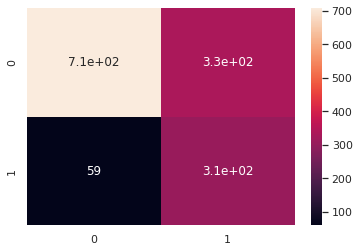

In [45]:
cm = confusion_matrix(y_test, y_predict4)
sns.heatmap(cm, annot = True)

### Decision Tree Classification

In [46]:
# %%Decision Tree Classification
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [47]:
y_predict5=model_dt.predict(X_test)

In [48]:
print(classification_report(y_test, y_predict5))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1041
           1       0.46      0.49      0.48       366

    accuracy                           0.72      1407
   macro avg       0.64      0.64      0.64      1407
weighted avg       0.72      0.72      0.72      1407



<AxesSubplot:>

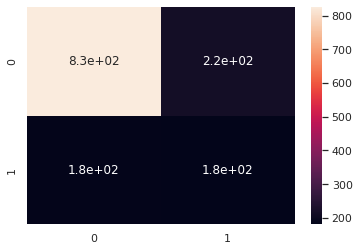

In [49]:
cm = confusion_matrix(y_test, y_predict5)
sns.heatmap(cm, annot = True)

In [50]:
# Print all results of each algorithm
print("Random Forest Classifier accuracy :", model_rf.score(X_test,y_test))
print("SVM accuracy :", model_svm.score(X_test,y_test))
print("KNN accuracy :", model_svm.score(X_test,y_test))
print("Naive Bayes accuracy :", model_svm.score(X_test,y_test))
print("Decision Tree accuracy :", model_dt.score(X_test,y_test))

Random Forest Classifier accuracy : 0.7938877043354655
SVM accuracy : 0.7953091684434968
KNN accuracy : 0.7953091684434968
Naive Bayes accuracy : 0.7953091684434968
Decision Tree accuracy : 0.7157071783937455


In [51]:
# Compare the Classication_report for each algorithm
print("Random Forest Classifier(RFC):")
print("RFC:",classification_report(y_test, y_predict1))
print()
print("SVM:", classification_report(y_test, y_predict2))
print()
print("KNN:")
print(classification_report(y_test, y_predict3))
print()
print("Naive Bayes:")
print(classification_report(y_test, y_predict4))
print()
print("Decision Tree:")
print(classification_report(y_test, y_predict5))


Random Forest Classifier(RFC):
RFC:               precision    recall  f1-score   support

           0       0.83      0.85      0.84      1041
           1       0.56      0.52      0.54       366

    accuracy                           0.77      1407
   macro avg       0.69      0.69      0.69      1407
weighted avg       0.76      0.77      0.76      1407


SVM:               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1041
           1       0.63      0.52      0.57       366

    accuracy                           0.80      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407


KNN:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1041
           1       0.52      0.49      0.51       366

    accuracy                           0.75      1407
   macro avg       0.68      0.67      0.67      1407
weighted avg       0.75   

* **SVM** performed the highest F1 Score among all algorithms. F1 score is the harmonic average of the precision and recall. The nearer the F1 score to the value 1 the better the precision and recall.
* **Precision** is a measure of the accuracy provided that a class label has been predicted where precision = TP / (TP + FP)
* **Recall** is the true positive rate where recall = TP / (TP + FN)

### PLOT ROC CURVES FOR THE 5 MODELS AND FIND AUC SCORES¶

ROC Curve is a metric that assesses the model ability to distinguish between binary (0 or 1) classes. The ROC curve is created by plotting the true positive rate(TPR) against the false positive rate (FPR) at various threshold setting. Points above the diagonal line represent good classification (better than random).

In [52]:
model_svm.predict_proba(X_test)

array([[0.98973955, 0.01026045],
       [0.298409  , 0.701591  ],
       [0.88233756, 0.11766244],
       ...,
       [0.88402489, 0.11597511],
       [0.95169426, 0.04830574],
       [0.83259544, 0.16740456]])

In [53]:
model_svm.predict_proba(X_test)[:, 1]

array([0.01026045, 0.701591  , 0.11766244, ..., 0.11597511, 0.04830574,
       0.16740456])

In [54]:
# ROC curve
from sklearn.metrics import roc_curve

fpr1, tpr1, thresh1 = roc_curve(y_test, model_svm.predict_proba(X_test)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, model_dt.predict_proba(X_test)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, model_gnb.predict_proba(X_test)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, model_knn.predict_proba(X_test)[:, 1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1], pos_label = 1)


In [55]:
# AUC score

from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, model_svm.predict_proba(X_test)[:, 1])
auc_score2 = roc_auc_score(y_test, model_dt.predict_proba(X_test)[:, 1])
auc_score3 = roc_auc_score(y_test, model_gnb.predict_proba(X_test)[:, 1])
auc_score4 = roc_auc_score(y_test, model_knn.predict_proba(X_test)[:, 1])
auc_score5 = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])



print("Support Vector Machine: ", auc_score1) # Support Vector Machine
print("Decision Tree: ", auc_score2) # Decision Tree
print("Naive Bayes: ", auc_score3) # Naive Bayes
print("K-Nearest Neighbors: ", auc_score4) # K-Nearest Neighbors
print("Random Forest: ", auc_score5) # Random Forest

Support Vector Machine:  0.8440825078870149
Decision Tree:  0.6443586190243723
Naive Bayes:  0.8282271145336293
K-Nearest Neighbors:  0.7804785226479374
Random Forest:  0.8168795242069679


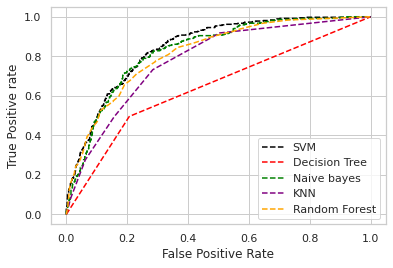

In [56]:
plt.plot(fpr1, tpr1, linestyle = "--", color = "black", label = "SVM")
plt.plot(fpr2, tpr2, linestyle = "--", color = "red", label = "Decision Tree")
plt.plot(fpr3, tpr3, linestyle = "--", color = "green", label = "Naive bayes")
plt.plot(fpr4, tpr4, linestyle = "--", color = "purple", label = "KNN")
plt.plot(fpr5, tpr5, linestyle = "--", color = "orange", label = "Random Forest")


#plt.title("Receiver Operator Characteristics ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

### CONCLUSION

* The graph shows that  Support Vector Machine algorithm produced the best AUC score. 
* Support Vector Machine algorithm also shows the highest F1  Score, so it is the best model
* The Decision Tree algorithm shows the lowest AUC score
* Customers having fiber optic internet service, using electronic payment and having month-to-month contract are tend to churn more
* Custmers having two-year contract and having no internet service are tend to not churn
 